<a href="https://colab.research.google.com/github/Athman-Athman/RESEARCH/blob/main/VTT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [ ]:
from pycaret import regression

In [1]:
import pandas as pd

# Load the data
file_path = './DATA_RESEARCH - Copy.xlsx'
data = pd.read_excel(file_path)

# Standardize column names to snake_case
data.columns = data.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Convert columns to appropriate data types
data['loa'] = pd.to_numeric(data['loa'], errors='coerce')
data['draft_arrival'] = pd.to_numeric(data['draft_arrival'], errors='coerce')
data['draft_departure'] = pd.to_numeric(data['draft_departure'], errors='coerce')
data['turnaround_time'] = pd.to_datetime(data['arrived_o/a']) - pd.to_datetime(data['drop_pilot'])


In [2]:
def summarize_statistics(df, columns):
    summary = df[columns].describe().transpose()
    return summary

summary_stats = summarize_statistics(data, ['gross_crane_hours', 'port_productivity', 'berth_productivity', 'operations_productivity'])
print(summary_stats)


                          count       mean        std        min        25%  \
gross_crane_hours        3091.0  56.553598  32.650481   0.330000  33.120000   
port_productivity        3091.0  10.268921   8.313110   0.057918   4.615511   
berth_productivity       3090.0  20.717319  10.799009   0.401822  14.735427   
operations_productivity  3091.0  23.280182  16.476861 -51.243243  16.617905   

                               50%        75%         max  
gross_crane_hours        54.780000  76.115000  263.590000  
port_productivity         7.950372  13.884095  181.600000  
berth_productivity       21.574082  27.056467  367.400000  
operations_productivity  23.813747  29.568353  749.795918  


In [3]:
def identify_anomalies(df, columns):
    anomalies = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        anomalies[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return anomalies

anomalies = identify_anomalies(data, ['gross_crane_hours', 'port_productivity', 'berth_productivity', 'operations_productivity'])
print(anomalies)


{'gross_crane_hours':         sn              vessel       reference_number voyage_number    loa  \
9       10     CITY OF BEIJING     CMAC/CITBEI/DZ177W        DZ177W    NaN   
13      14       ER COPENHAGEN       MSKC/ERCOPE/1201          1201    NaN   
19      20  SAFMARINE CAMEROUN       MSKC/SAFCAM/1203          1203    NaN   
20      21             ER CAEN       MSKC/ERCAEN/1203          1203    NaN   
21      22          MSC JEMIMA        MSCC/MSCJEM/35R           35R    NaN   
...    ...                 ...                    ...           ...    ...   
3064  3065  CMA CGM AFRICA ONE  CAMC/CMAONE/04GDIE1MA     04GDIE1MA  228.0   
3065  3066          KOTA MANIS  PILC/KOTMAN/KMNS0243E     KMNS0243E  221.0   
3068  3069       MAERSK PATRAS       MSKC/MAEPAT/249N          249N  210.0   
3074  3075          CAP CARMEL       MSKC/CAPCAR/250N          250N  208.0   
3087  3088    SAFMARINE NYASSA       MSKC/SAFNYA/252N          252N  210.0   

       rot berth  draft_arrival  draft_de

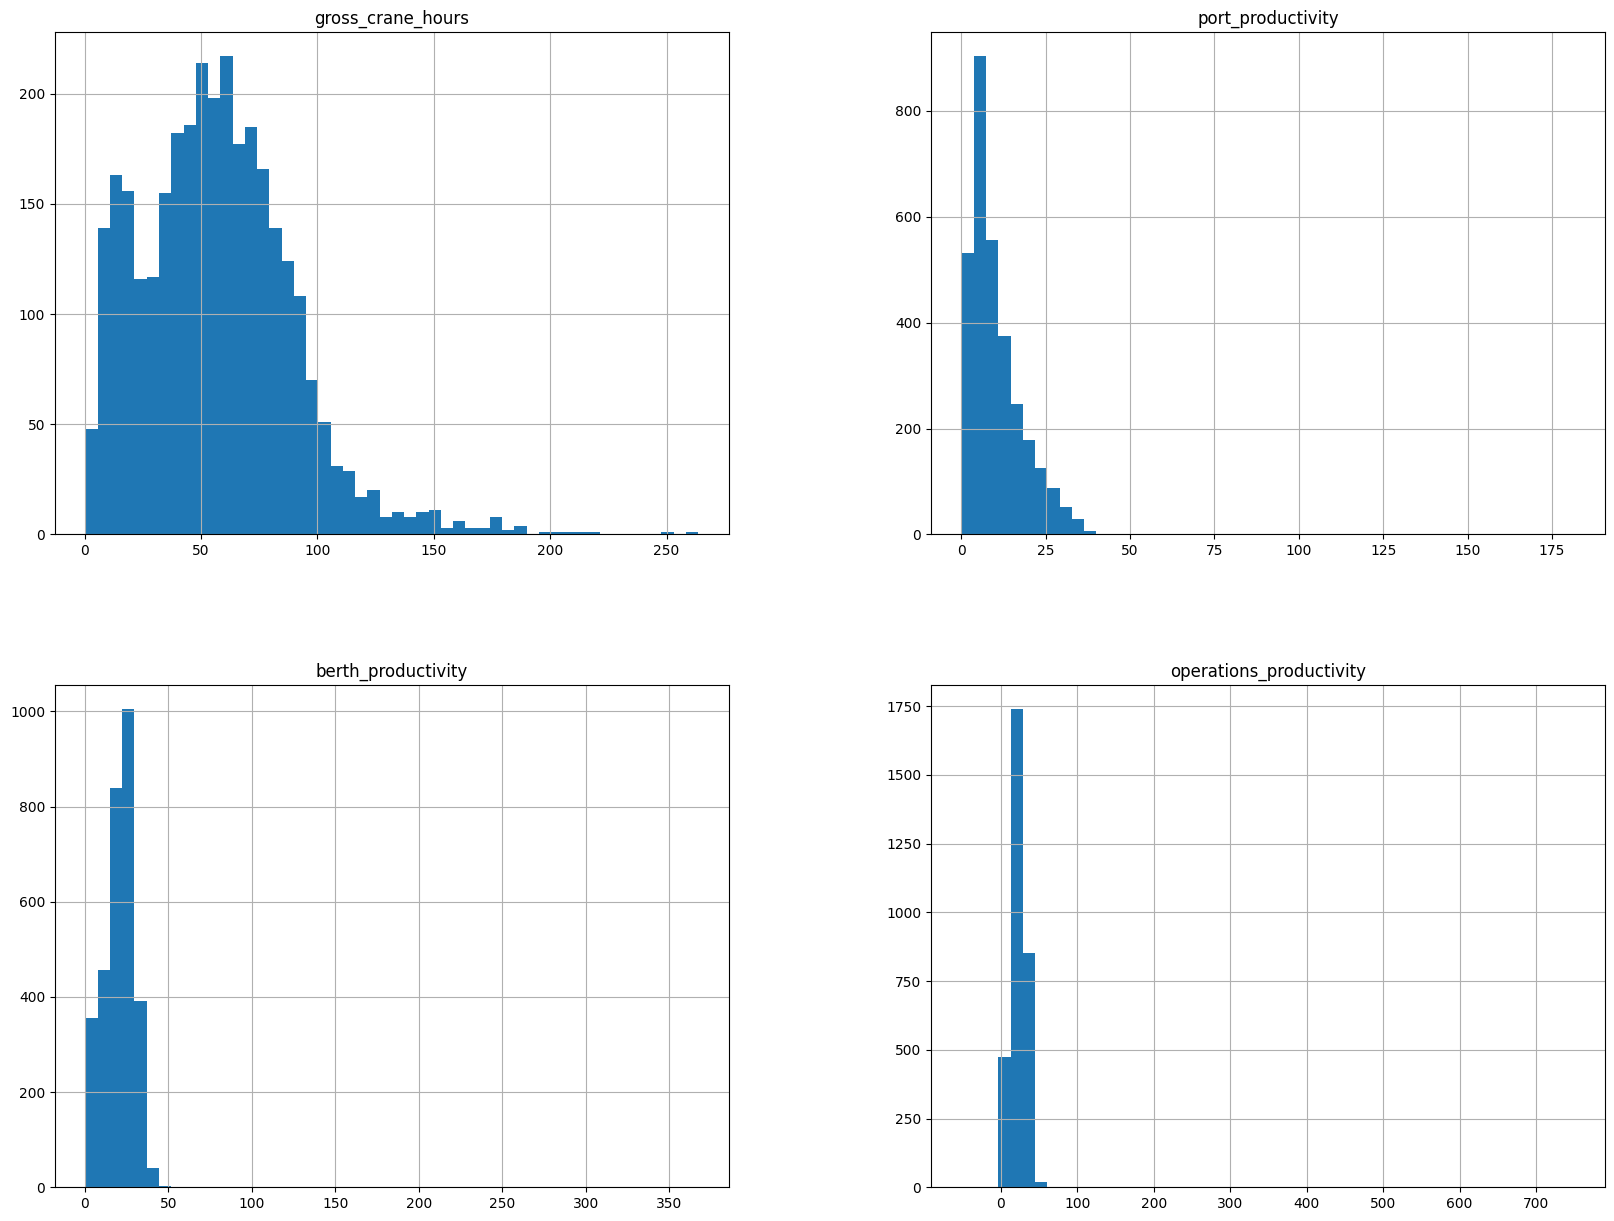

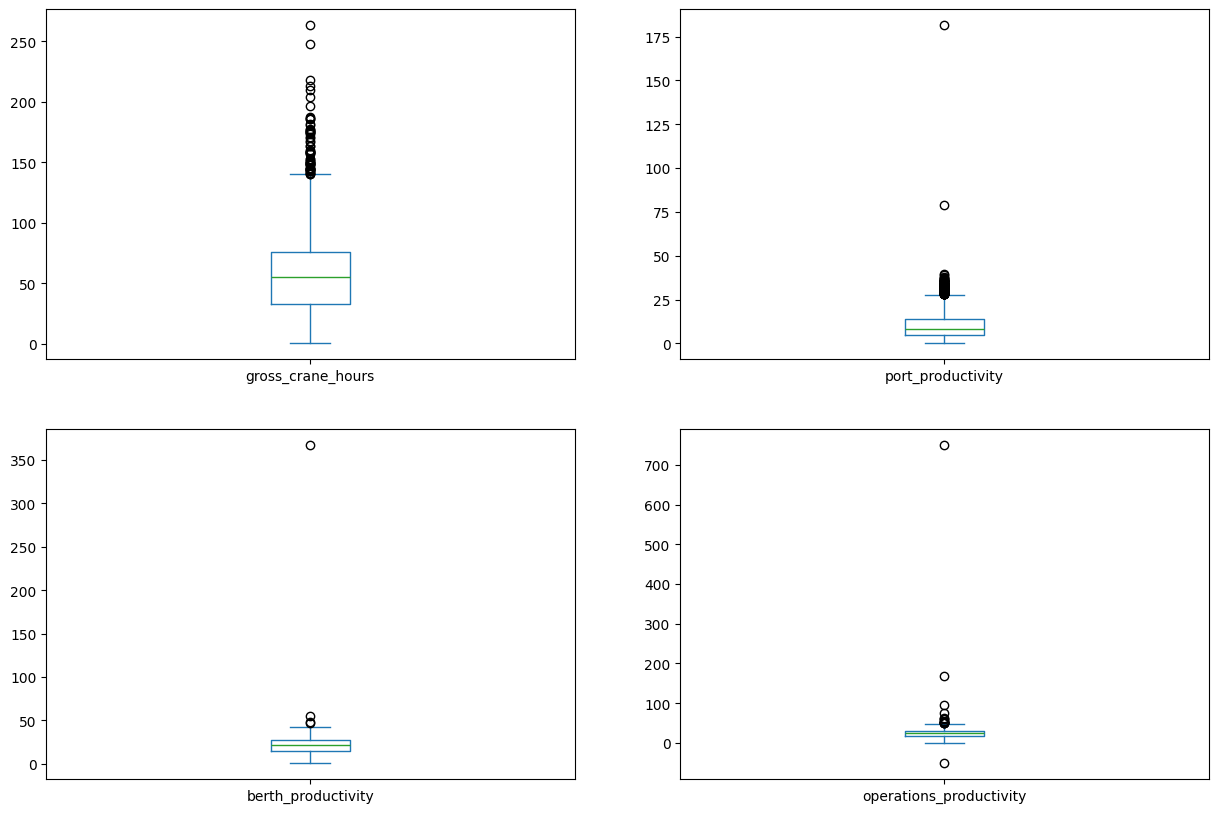

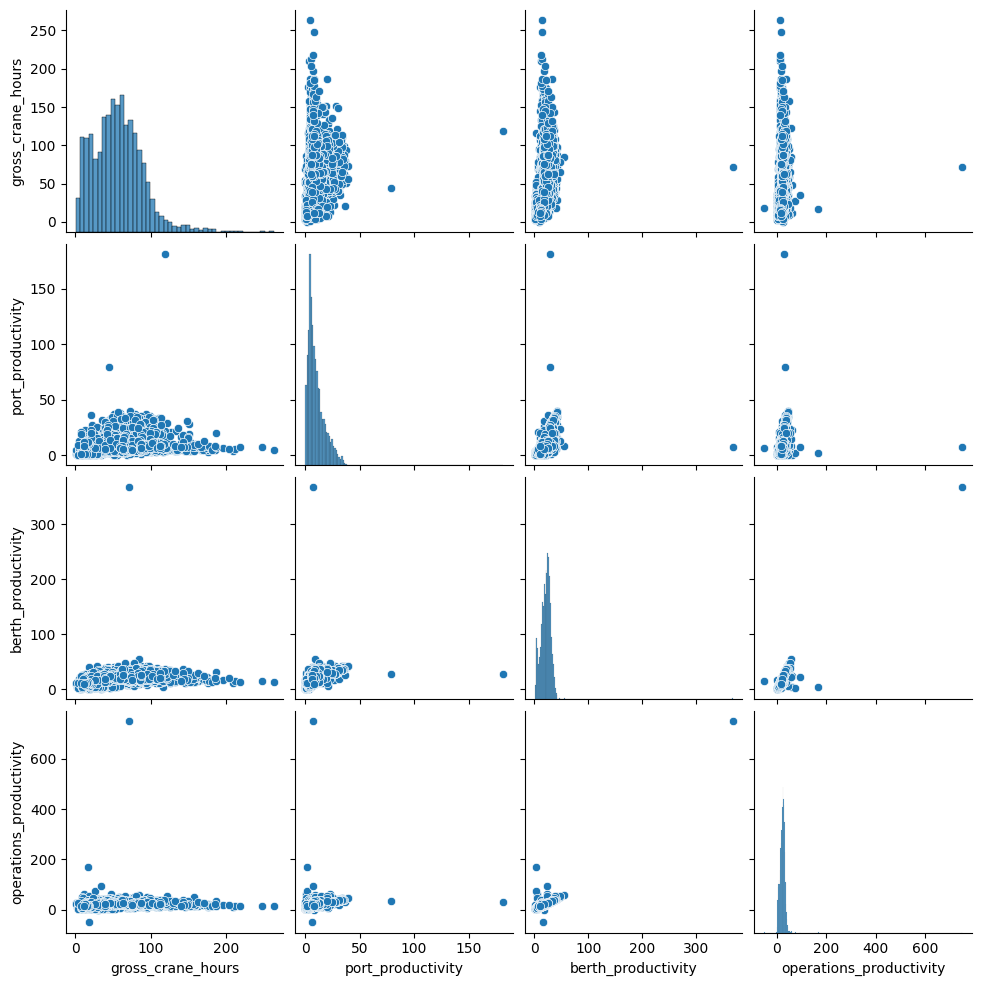

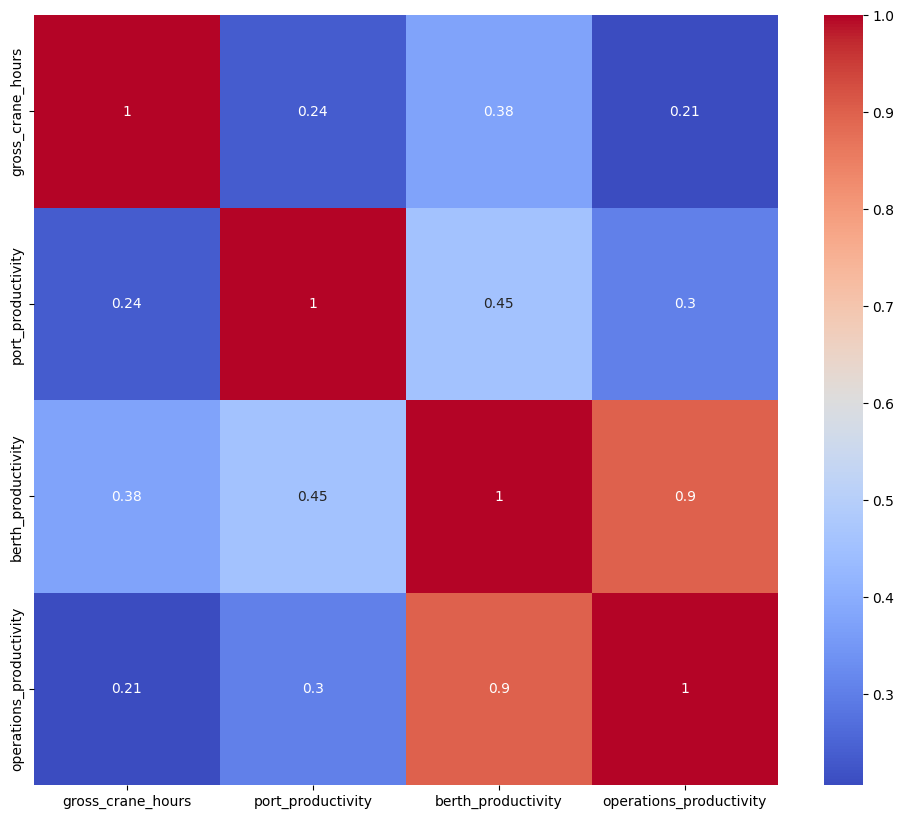

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot histograms for selected columns
def plot_histograms(df, columns, bins=50):
    df[columns].hist(bins=bins, figsize=(20, 15))
    plt.show()

# Function to plot boxplots for selected columns
def plot_boxplots(df, columns):
    df[columns].plot(kind='box', subplots=True, layout=(2, 2), figsize=(15, 10))
    plt.show()

# Function to plot scatter plot matrix for selected columns
def plot_scatter_matrix(df, columns):
    sns.pairplot(df[columns])
    plt.show()

# Function to plot heatmap for correlations
def plot_heatmap(df, columns):
    plt.figure(figsize=(12, 10))
    correlation_matrix = df[columns].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.show()

# Select columns for analysis
selected_columns = ['gross_crane_hours', 'port_productivity', 'berth_productivity', 'operations_productivity']

# Execute visualizations
plot_histograms(data, selected_columns)
plot_boxplots(data, selected_columns)
plot_scatter_matrix(data, selected_columns)
plot_heatmap(data, selected_columns)


In [ ]:
# Save summary statistics to CSV
summary_stats.to_csv('summary_statistics.csv', index=True)

# Prepare anomalies for saving
anomalies_dict = {col: anomalies[col].to_dict('records') for col in anomalies}
anomalies_df = pd.DataFrame([{**{'column': col}, **anomaly} for col in anomalies_dict for anomaly in anomalies_dict[col]])

# Save anomalies to CSV
anomalies_df.to_csv('anomalies.csv', index=False)


EXPLORATORY DATA ANALYSIS (EDA)

1.  Load the data and display its structure to understand key variables

In [ ]:
import pandas as pd

# Load the data
file_path = './DATA_RESEARCH.xlsx'  # Update with your file path
data = pd.read_excel(file_path)

# Display the first few rows of the data to understand its structure and content
print(data.head())
print(data.info())

data = pd.read_excel('DATA_RESEARCH.xlsx')
# Convert the 'ARRIVED O/A' and 'DROP PILOT' columns to datetime
data['ARRIVED O/A'] = pd.to_datetime(data['ARRIVED O/A'], errors='coerce')
data['DROP PILOT'] = pd.to_datetime(data['DROP PILOT'], errors='coerce')

# Calculate the turnaround time
data['TURNAROUND TIME'] = (data['DROP PILOT'] - data['ARRIVED O/A']).dt.total_seconds() / 3600
data = data[data['TURNAROUND TIME'] >= 0]


   SN          VESSEL     REFERENCE NUMBER VOYAGE NUMBER  LOA   ROT BERTH  \
0   1     WEHR WARNOW    MSKC/WEHRWAR/1201          1201  NaN  4294     9   
1   2  ROYAL ZANZIBAR    MSCC/ROYZAN/1007R         1007R  NaN  4353    10   
2   3        MANTENHA     MSCC/MVMANT/160R          160R  NaN  4270     9   
3   4          PARDIS  HDSC/PARDIS/SAS0017       SAS0017  NaN  4259    11   
4   5     MSC JASMINE      MSCC/MSCJAS/52R           52R  NaN  4299     9   

   DRAFT (ARRIVAL) DRAFT (DEPARTURE)  LINE  ... GROSS CRANE HOURS  \
0              7.6               8.7   MSK  ...             32.00   
1              3.2               4.5   MSC  ...              7.85   
2              3.4               4.5   MSC  ...              7.00   
3             11.4               9.7  HDSC  ...             91.21   
4             11.2                10   MSC  ...             41.62   

   AVGE MOVE /GROSS HR  NET CRANE HOURS  AVGE MOVE /NET HR  \
0            16.531250            20.75          25.493976  

2. Visualize Data Distributions

2.1 Histograms

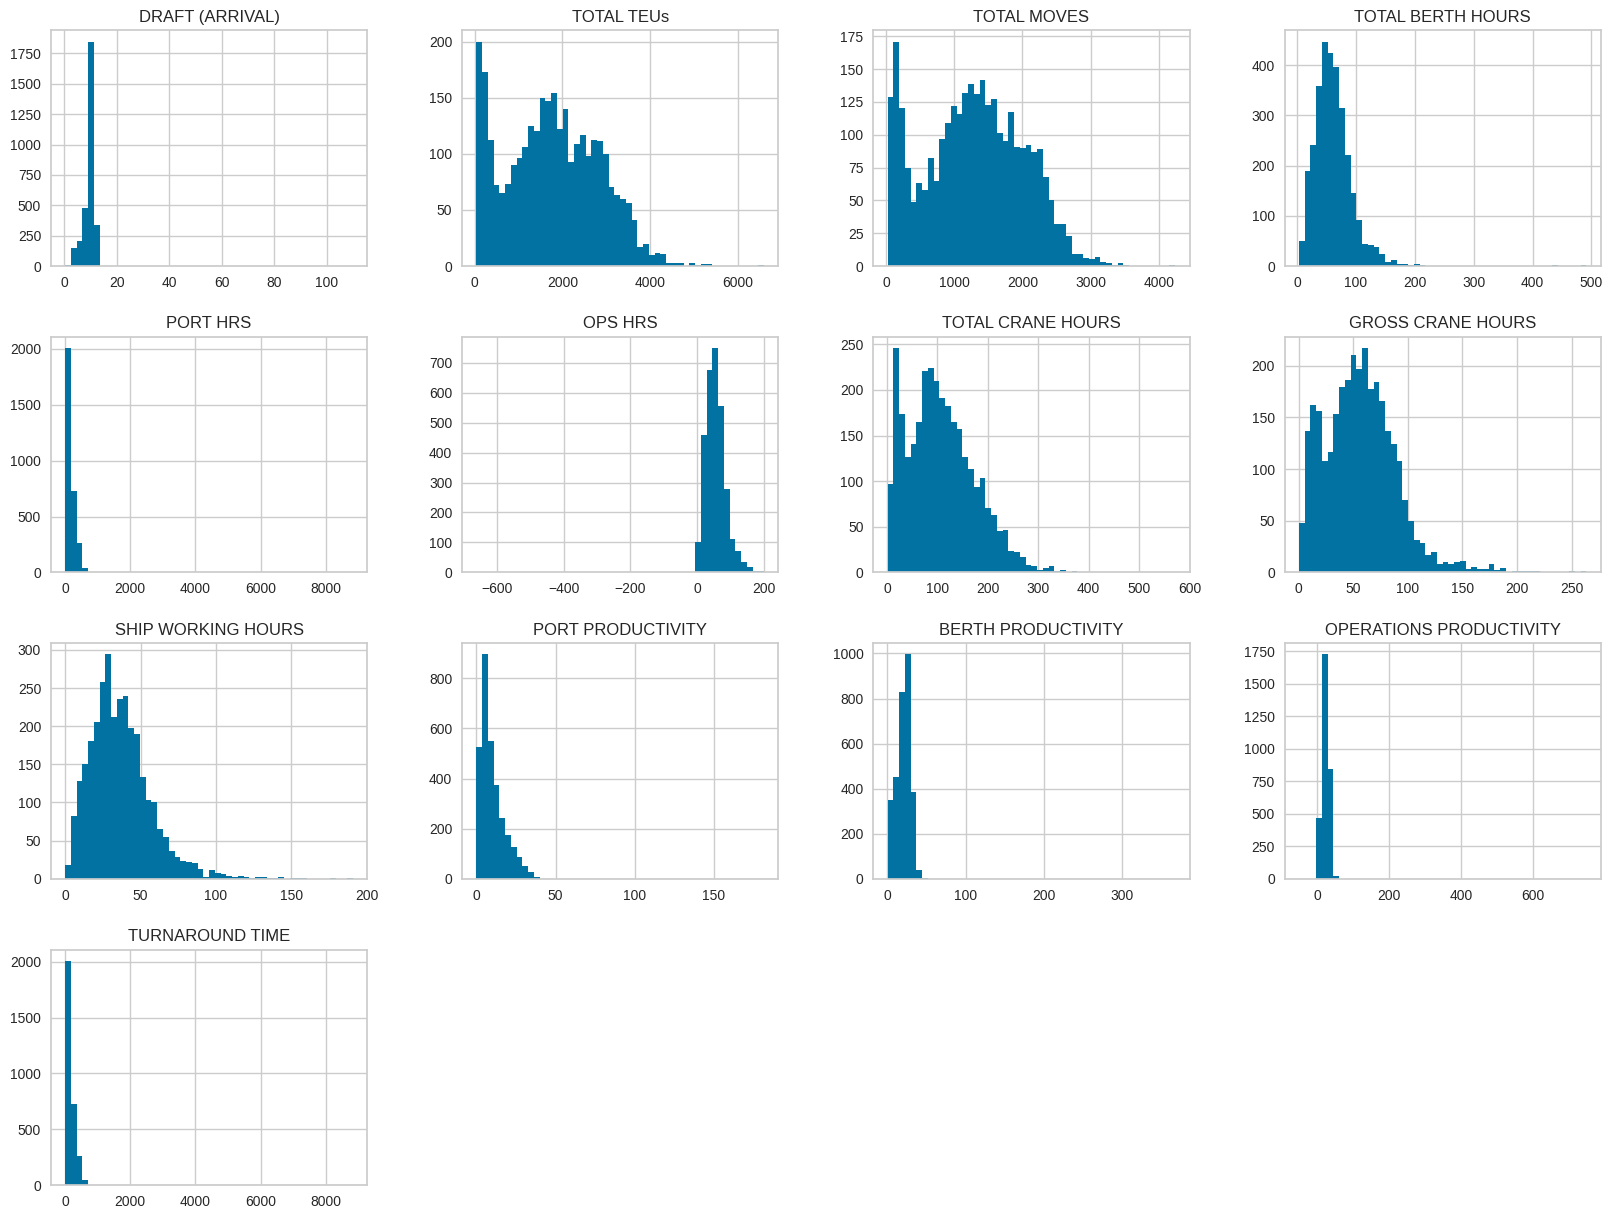

In [ ]:
import matplotlib.pyplot as plt

def plot_histograms(df, columns, bins=50):
    df[columns].hist(bins=bins, figsize=(20, 15))
    plt.show()

# Select key variables for prediction of vessel turnaround time
selected_columns = ['DRAFT (ARRIVAL)','DRAFT (DEPARTURE)','TOTAL TEUs', 'TOTAL MOVES', 'TOTAL BERTH HOURS', 'PORT HRS','OPS HRS','TOTAL CRANE HOURS','GROSS CRANE HOURS','SHIP WORKING HOURS','PORT PRODUCTIVITY','BERTH PRODUCTIVITY','OPERATIONS PRODUCTIVITY', 'TURNAROUND TIME']

# Plot histograms for each selected column
plot_histograms(data, selected_columns)


2.2 Box Plots

In [ ]:
selected_columns = ['DRAFT (ARRIVAL)','DRAFT (DEPARTURE)','TOTAL TEUs', 'TOTAL MOVES', 'TOTAL BERTH HOURS','OPS HRS','TOTAL CRANE HOURS','GROSS CRANE HOURS','SHIP WORKING HOURS','PORT PRODUCTIVITY','BERTH PRODUCTIVITY','OPERATIONS PRODUCTIVITY', 'TURNAROUND TIME']

# data.drop(columns = ['PORT HRS'], inplace = True)
# selected_columns.remove(['PORT HRS'])

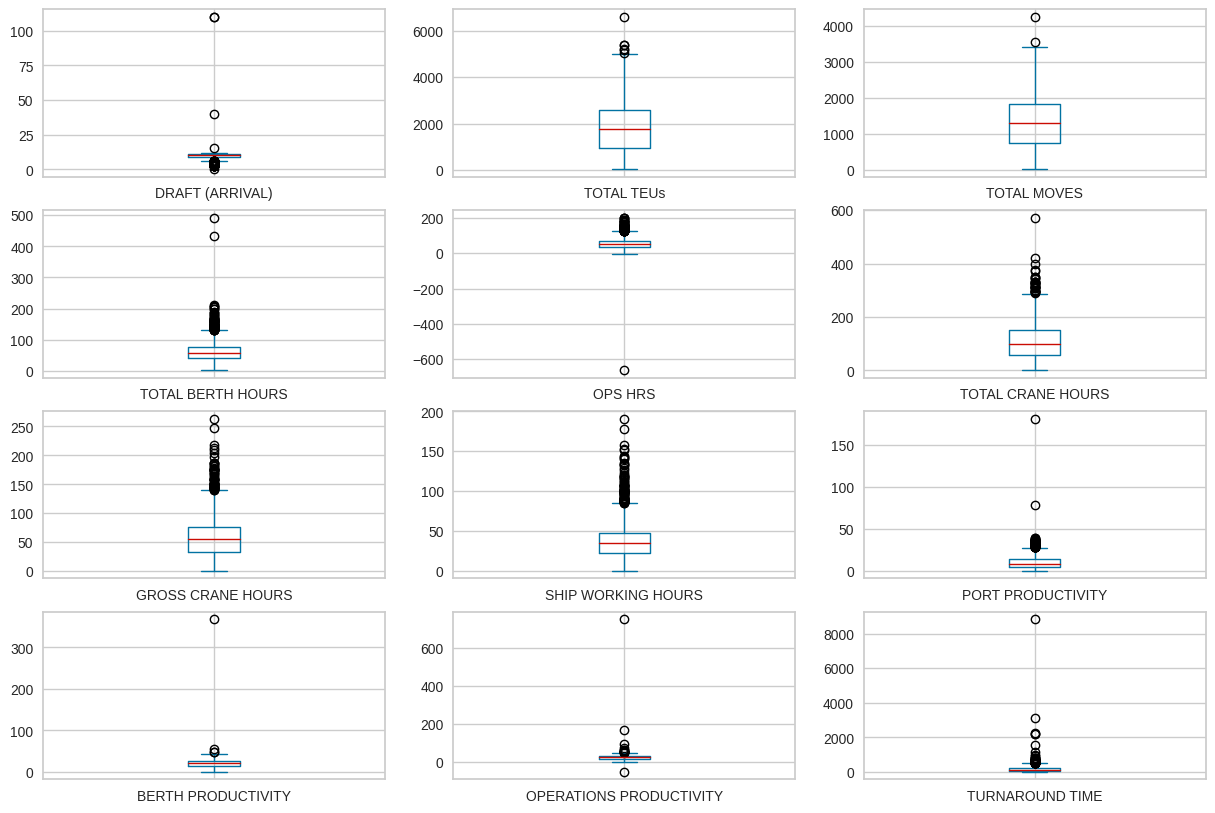

In [ ]:
def plot_boxplots(df, columns):
    df[columns].plot(kind='box', subplots=True, layout=(4, 3), figsize=(15, 10))
    plt.show()

# Plot boxplots for each selected column
plot_boxplots(data, selected_columns)


3.  Analyze Relationships

3.1 Scatter Plots

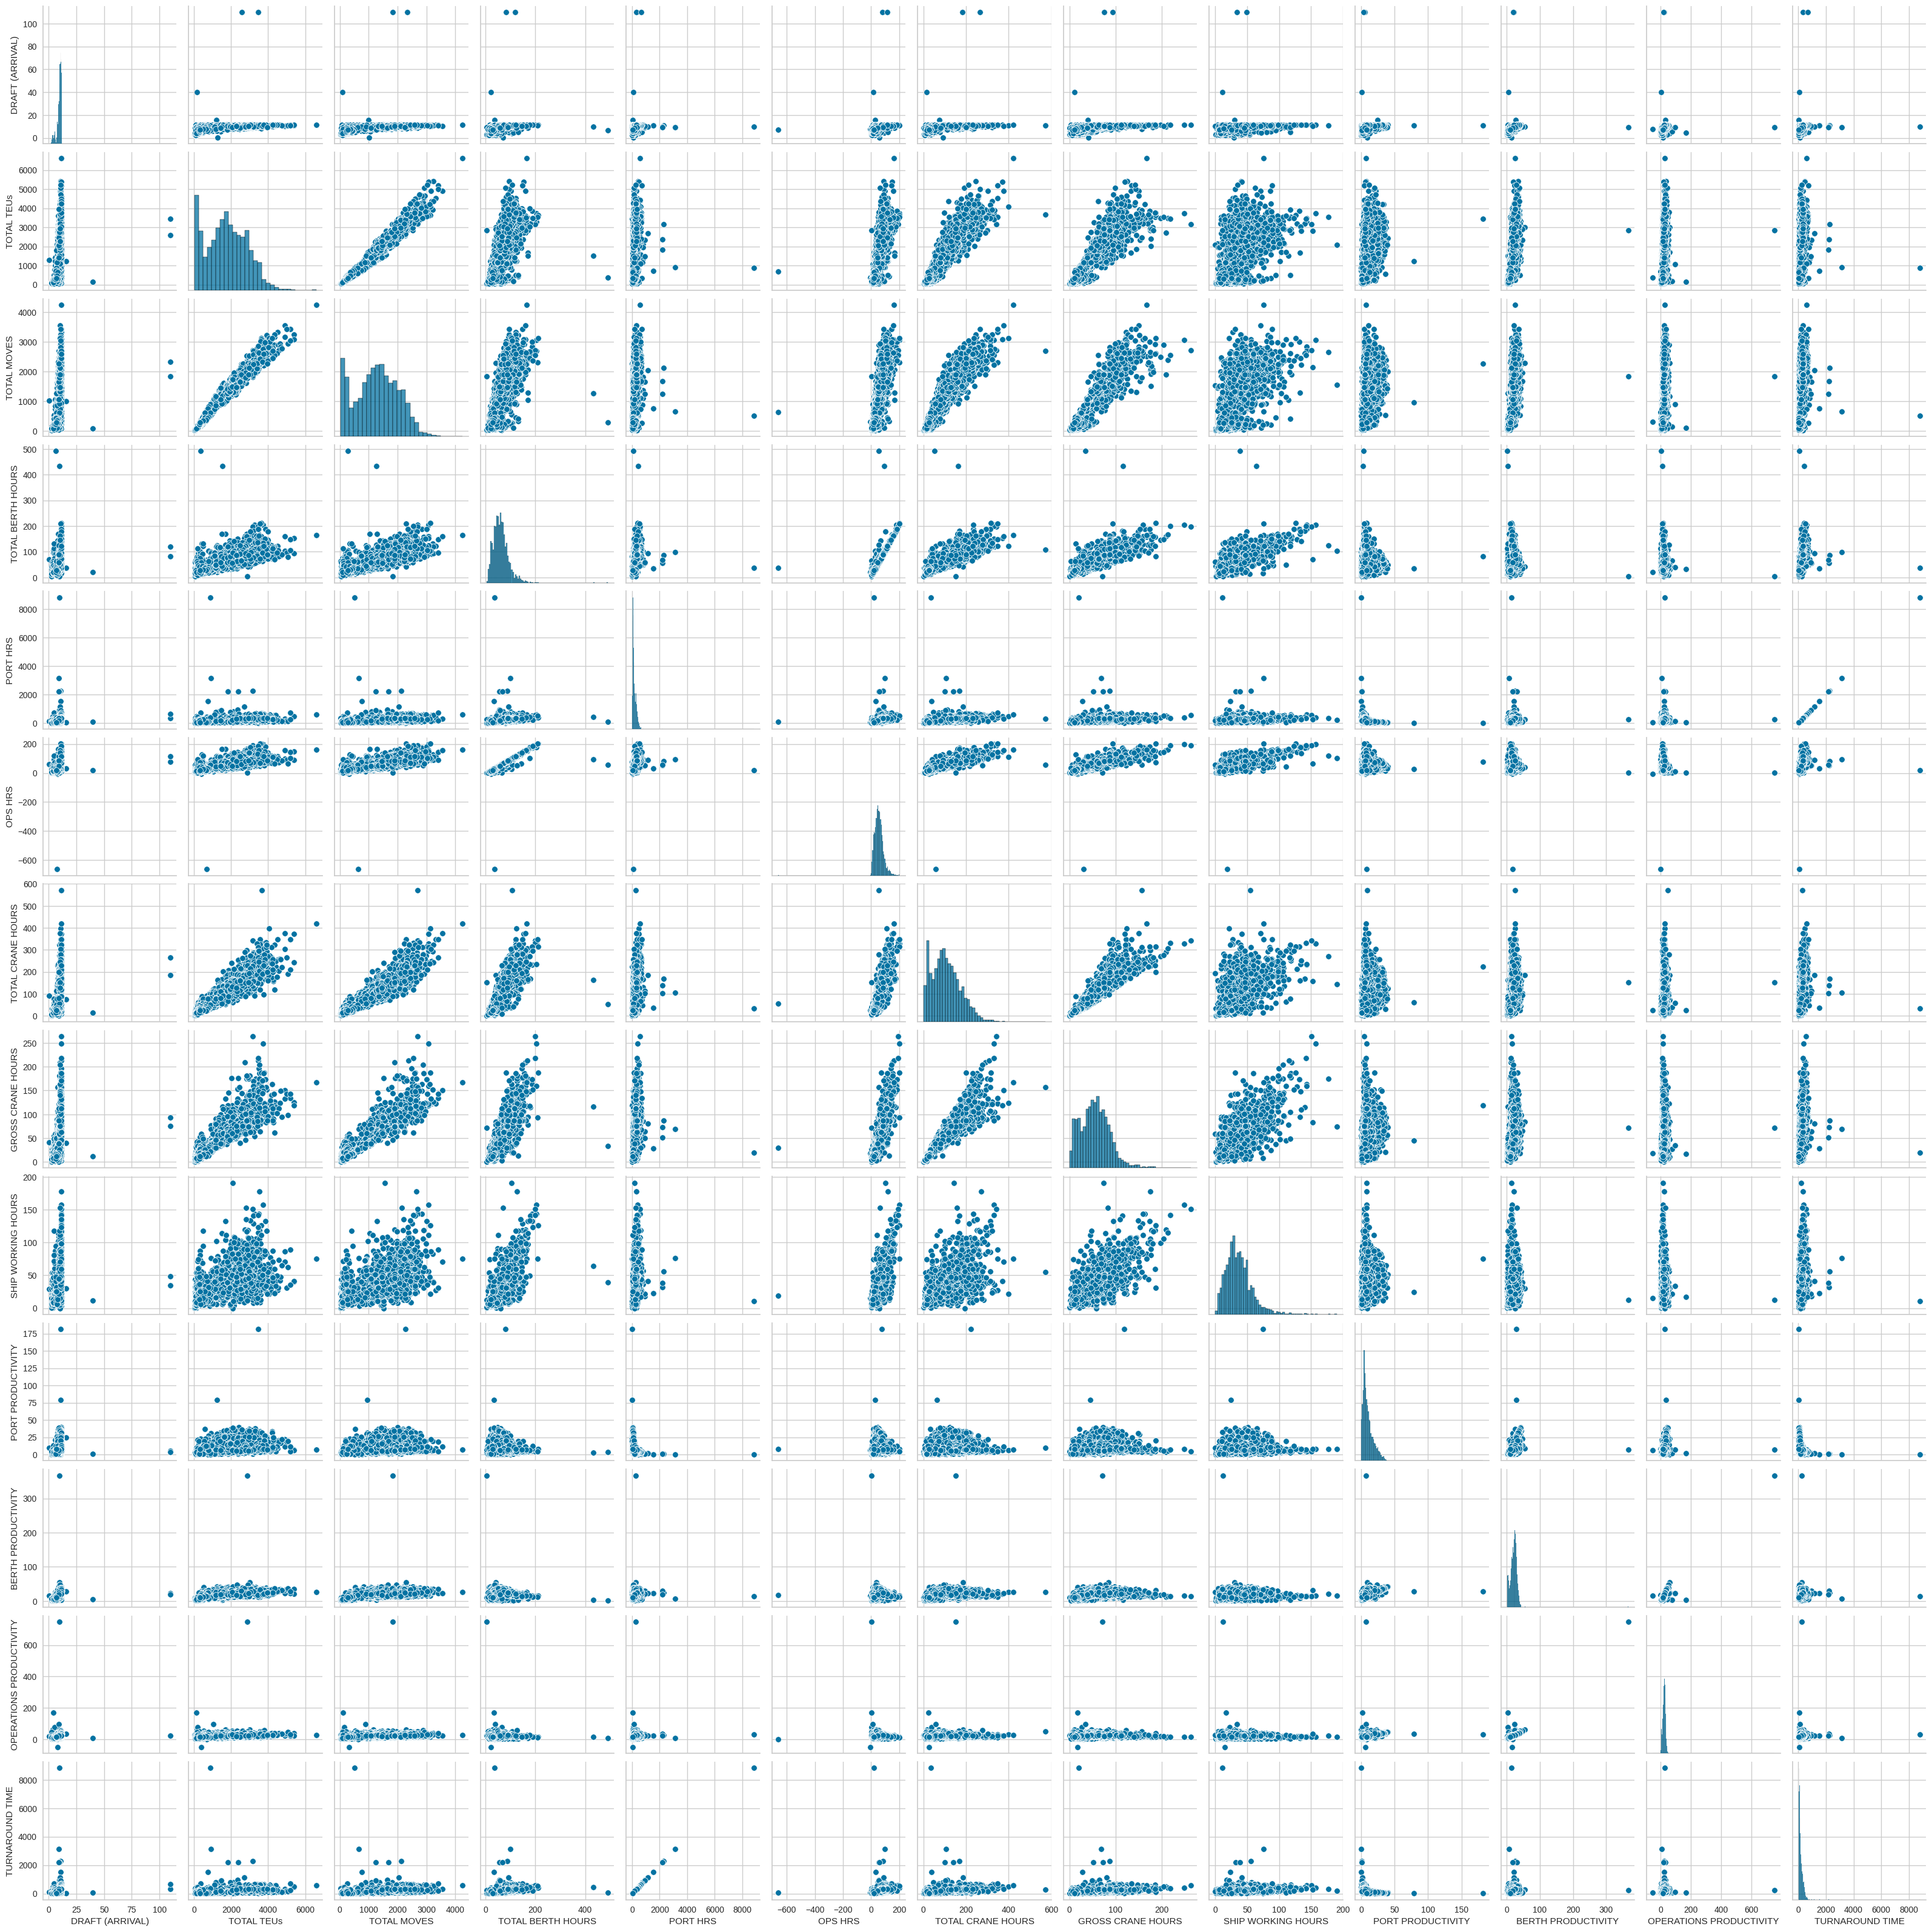

In [ ]:
import seaborn as sns

def plot_scatter_matrix(df, columns):
    sns.pairplot(df[columns])
    plt.show()

# Plot scatter plot matrix for selected columns
plot_scatter_matrix(data, selected_columns)


3.2 Heatmap

In [ ]:
data.replace({'10..2':'10.2'}, inplace = True)

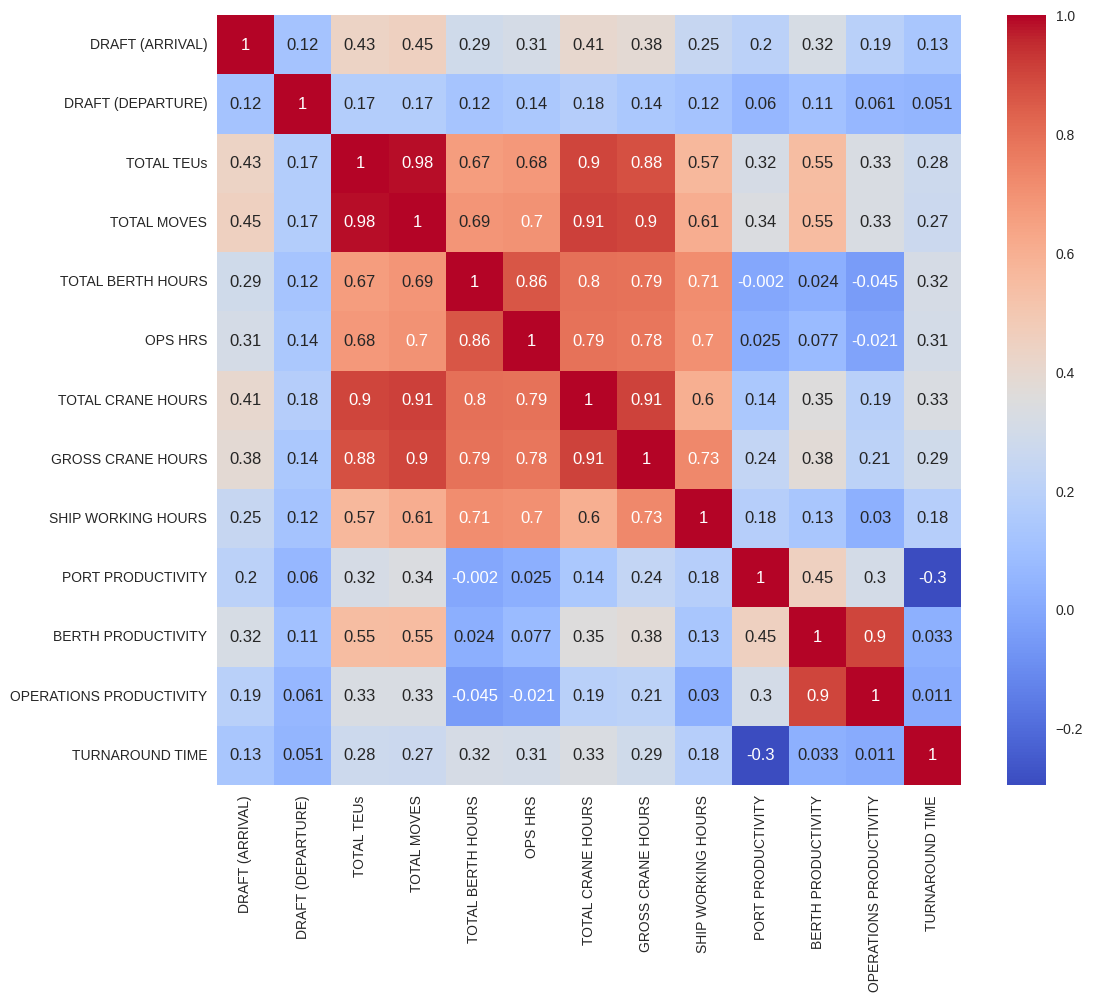

In [ ]:
def plot_heatmap(df, columns):
    plt.figure(figsize=(12, 10))
    correlation_matrix = df[columns].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.show()

# Plot heatmap for selected columns
plot_heatmap(data, selected_columns)


4.  Summary Statistics

In [ ]:
def summarize_statistics(df, columns):
    summary = df[columns].describe().transpose()
    return summary

# Summarize statistics for the selected columns
summary_stats = summarize_statistics(data, selected_columns)
print(summary_stats)

# Save summary statistics to CSV
summary_stats.to_csv('summary_stats.csv', index=True)

                          count         mean          std         min  \
DRAFT (ARRIVAL)          3031.0     9.547493     3.322346    0.300000   
TOTAL TEUs               3063.0  1770.202416  1072.629188   38.000000   
TOTAL MOVES              3063.0  1280.289585   732.087401   25.000000   
TOTAL BERTH HOURS        3062.0    61.410379    31.527418    3.333333   
OPS HRS                  3063.0    55.490233    32.411253 -662.133333   
TOTAL CRANE HOURS        3063.0   107.782067    67.124634    1.330000   
GROSS CRANE HOURS        3063.0    56.647447    32.625714    0.330000   
SHIP WORKING HOURS       3052.0    37.110941    20.990743    0.000000   
PORT PRODUCTIVITY        3063.0    10.265597     8.310841    0.057918   
BERTH PRODUCTIVITY       3062.0    20.715174    10.812759    0.401822   
OPERATIONS PRODUCTIVITY  3063.0    23.274229    16.524617  -51.243243   
TURNAROUND TIME          3063.0   178.046316   223.030459    9.416667   

                                25%          50%  

5.  Identify Anomalies and Patterns

In [ ]:
data

,SN,VESSEL,REFERENCE NUMBER,VOYAGE NUMBER,LOA,ROT,BERTH,DRAFT (ARRIVAL),DRAFT (DEPARTURE),LINE,...,AVGE MOVE /GROSS HR,NET CRANE HOURS,AVGE MOVE /NET HR,SHIP WORKING HOURS,AVGE MOVE /SW HR,PORT PRODUCTIVITY,BERTH PRODUCTIVITY,OPERATIONS PRODUCTIVITY,MACHINE TYPE,TURNAROUND TIME
0,1,WEHR WARNOW,MSKC/WEHRWAR/1201,1201,NaN,4294,9,7.6,8.7,MSK,...,16.531250,20.75,25.493976,20.66,25.605034,2.512467,16.318766,18.085470,SSG,210.550000
1,2,ROYAL ZANZIBAR,MSCC/ROYZAN/1007R,1007R,NaN,4353,10,3.2,4.5,MSC,...,12.484076,6.26,15.654952,11.75,8.340426,0.746004,4.215054,4.900000,SC,131.366667
2,3,MANTENHA,MSCC/MVMANT/160R,160R,NaN,4270,9,3.4,4.5,MSC,...,14.285714,7.00,14.285714,12.25,8.163265,0.346861,3.296703,3.921569,SC,288.300000
3,4,PARDIS,HDSC/PARDIS/SAS0017,SAS0017,NaN,4259,11,11.4,9.7,HDSC,...,12.674049,77.71,14.875820,48.57,23.800700,3.630463,17.232298,18.595174,SSG & SC,318.416667
4,5,MSC JASMINE,MSCC/MSCJAS/52R,52R,NaN,4299,9,11.2,10,MSC,...,21.095627,34.96,25.114416,29.00,30.275862,3.053913,19.191257,21.029940,SSG,287.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3086,3087,IMKE SCHEPERS,GSLC/IMKSCH/30E,30E,155,4246,10*11,6.6,5.2,GSL,...,31.787176,5.91,39.424704,47.26,4.930174,1.355176,11.007874,15.672646,NaN,171.933333
3087,3088,SAFMARINE NYASSA,MSKC/SAFNYA/252N,252N,210,4210,9*10,11.3,10.9,MSK,...,13.903254,176.64,14.611639,59.63,43.283582,7.969329,21.069388,22.663545,NaN,323.866667
3088,3089,KOTA MAKMUR,PILC/KOTMAK/KMAK0247E,KMAK0247E,221,4238,8.9,9.4,9,PIL,...,25.841539,84.59,26.681641,22.00,102.590909,6.722597,25.147632,26.183295,NaN,335.733333
3089,3090,APL SAIPAN,CMAC/APLSAI/04GDUE1MA,04GDUE1MA,169,4256,11,8.9,9.5,CMA,...,27.591542,31.86,33.584432,45.00,23.777778,5.888828,18.135593,22.677499,NaN,181.700000


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

# Assuming 'data' is your DataFrame

# Step 1: Encode categorical columns and standardize numerical columns
label_encoder = LabelEncoder()
numerical_columns = []

for column in data.columns:
    if data[column].dtypes == 'datetime64[ns]':
        continue  # Skip datetime columns
    elif data[column].dtypes != object:
        numerical_columns.append(column)
    else:
        data[column] = label_encoder.fit_transform(data[column].astype(str))
# Drop datetime columns
# data = data[numerical_columns]


In [ ]:

# Standardize the numerical columns
scaler = StandardScaler()
data_new = scaler.fit_transform(data[numerical_columns])

# Step 2: Perform PCA to reduce to two components
pca = PCA(n_components=2)
data_pca = pca.fit_transform(pd.DataFrame(data_new).fillna(0))

# Convert PCA result to a DataFrame
pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

# Step 3: Anomaly detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.1)  # Adjust contamination according to your needs
anomalies = iso_forest.fit_predict(pca_df)

# Add the anomaly result to the DataFrame
pca_df['Anomaly'] = anomalies


# Print the DataFrame with PCA components and anomaly labels
print(pca_df)


           PC1       PC2  Anomaly
0    -3.593626 -0.604212        1
1    -6.942825 -1.348465        1
2    -6.734618 -1.305827        1
3    -0.869663 -3.405057       -1
4    -2.729516 -0.654651        1
...        ...       ...      ...
3058 -4.775312  2.221111        1
3059  7.030700 -1.682657       -1
3060  5.071444  1.897293        1
3061 -1.072019  1.217913        1
3062 -4.407271  1.891272        1

[3063 rows x 3 columns]


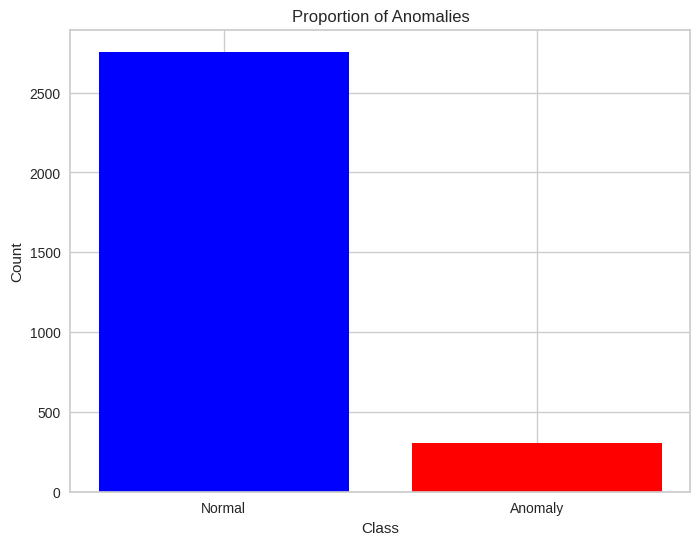

In [ ]:
# Step 4: Visualize the proportion of anomalies
anomaly_counts = pca_df['Anomaly'].value_counts()
anomaly_labels = ['Normal', 'Anomaly']

plt.figure(figsize=(8, 6))
plt.bar(anomaly_labels, anomaly_counts, color=['blue', 'red'])
plt.title('Proportion of Anomalies')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

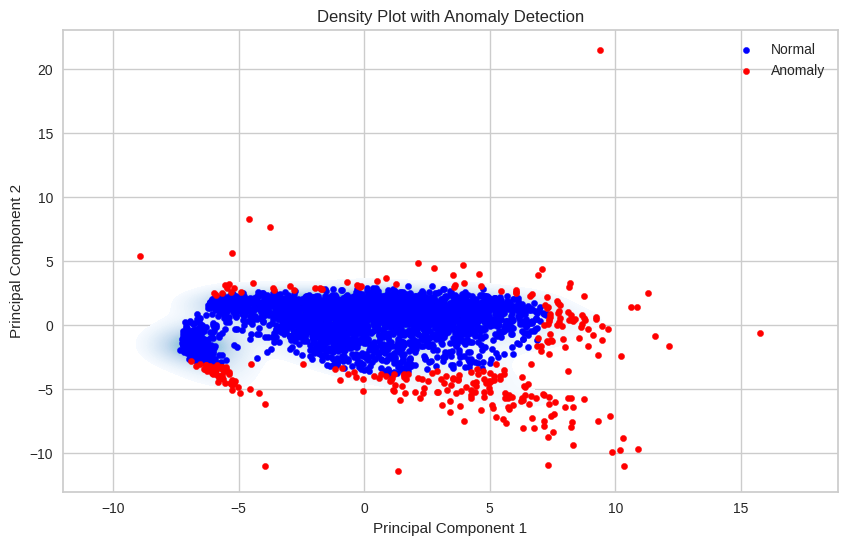

In [ ]:
# Plotting the anomalies on a density plot
plt.figure(figsize=(10, 6))

# Create a density plot
sns.kdeplot(data=pca_df, x='PC1', y='PC2', fill=True, cmap="Blues", thresh=0.05, levels=100)

# Overlay the scatter plot of anomalies
normal = pca_df[pca_df['Anomaly'] == 1]
anomaly = pca_df[pca_df['Anomaly'] == -1]

plt.scatter(normal['PC1'], normal['PC2'], c='blue', label='Normal', s=20)
plt.scatter(anomaly['PC1'], anomaly['PC2'], c='red', label='Anomaly', s=20)

plt.title('Density Plot with Anomaly Detection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

DATA PRE-PROCESSING

Clean the Data

Handle Missing Values

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (example: fill with median for numerical columns)
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    data[column] = data[column].fillna(data[column].median())

# For categorical columns, fill with the most frequent value
for column in data.select_dtypes(include=['object']).columns:
    data[column] = data[column].fillna(data[column].mode()[0])

# Verify that there are no missing values left
print(data.isnull().sum())


SN                         0
VESSEL                     0
REFERENCE NUMBER           0
VOYAGE NUMBER              0
LOA                        0
                          ..
PORT PRODUCTIVITY          0
BERTH PRODUCTIVITY         1
OPERATIONS PRODUCTIVITY    0
MACHINE TYPE               0
TURNAROUND TIME            0
Length: 81, dtype: int64
SN                         0
VESSEL                     0
REFERENCE NUMBER           0
VOYAGE NUMBER              0
LOA                        0
                          ..
PORT PRODUCTIVITY          0
BERTH PRODUCTIVITY         0
OPERATIONS PRODUCTIVITY    0
MACHINE TYPE               0
TURNAROUND TIME            0
Length: 81, dtype: int64


Handle Outliers

In [ ]:
# Function to cap outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: min(max(x, lower_bound), upper_bound))
    return df

# Apply capping to the outlier columns
outlier_columns = ['GROSS CRANE HOURS','PORT PRODUCTIVITY','BERTH PRODUCTIVITY','OPERATIONS PRODUCTIVITY']
for col in outlier_columns:
    data = cap_outliers(data, col)

# Verify the results
print(data.describe())


                SN       VESSEL  REFERENCE NUMBER  VOYAGE NUMBER          LOA  \
count  3063.000000  3063.000000       3063.000000    3063.000000  3063.000000   
mean   1548.714985   352.389161       1527.362063    1108.431277   103.330069   
min       1.000000     0.000000          0.000000       0.000000     0.000000   
25%     773.500000   166.000000        764.500000     656.000000    81.000000   
50%    1551.000000   378.000000       1528.000000     963.000000   105.000000   
75%    2322.500000   516.500000       2290.500000    1650.500000   142.000000   
max    3091.000000   692.000000       3054.000000    2398.000000   142.000000   
std     893.746597   198.400786        881.976798     658.455282    35.306928   

               ROT        BERTH  DRAFT (ARRIVAL)  DRAFT (DEPARTURE)  \
count  3063.000000  3063.000000      3063.000000        3063.000000   
mean   1108.031015     8.525955         9.553265          76.257917   
min       0.000000     0.000000         0.300000         

Transformation of Data

Normalize Numerical Variables

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[outlier_columns] = scaler.fit_transform(data[outlier_columns])

# Verify the results
print(data.describe())


                SN       VESSEL  REFERENCE NUMBER  VOYAGE NUMBER          LOA  \
count  3063.000000  3063.000000       3063.000000    3063.000000  3063.000000   
mean   1548.714985   352.389161       1527.362063    1108.431277   103.330069   
min       1.000000     0.000000          0.000000       0.000000     0.000000   
25%     773.500000   166.000000        764.500000     656.000000    81.000000   
50%    1551.000000   378.000000       1528.000000     963.000000   105.000000   
75%    2322.500000   516.500000       2290.500000    1650.500000   142.000000   
max    3091.000000   692.000000       3054.000000    2398.000000   142.000000   
std     893.746597   198.400786        881.976798     658.455282    35.306928   

               ROT        BERTH  DRAFT (ARRIVAL)  DRAFT (DEPARTURE)  \
count  3063.000000  3063.000000      3063.000000        3063.000000   
mean   1108.031015     8.525955         9.553265          76.257917   
min       0.000000     0.000000         0.300000         

Encode Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Verify the results
print(data.head())


   SN  VESSEL  REFERENCE NUMBER  VOYAGE NUMBER  LOA   ROT  BERTH  \
0   1     680              2821            655  142  1794     12   
1   2     594              1945            564  142  1806      2   
2   3     400              1849            907  142  1791     12   
3   4     573              1317           2179  142  1788      6   
4   5     455              1586           1444  142  1795     12   

   DRAFT (ARRIVAL)  DRAFT (DEPARTURE)  LINE  ...  AVGE MOVE /GROSS HR  \
0              7.6                 93    28  ...            16.531250   
1              3.2                 43    25  ...            12.484076   
2              3.4                 43    25  ...            14.285714   
3             11.4                110    21  ...            12.674049   
4             11.2                  5    25  ...            21.095627   

   NET CRANE HOURS  AVGE MOVE /NET HR  SHIP WORKING HOURS  AVGE MOVE /SW HR  \
0            20.75          25.493976               20.66         25.6050

Split the Data

Split the Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

# Define the target variable (assuming 'turnaround_time' is the target)
target = 'TURNAROUND TIME'
X = data.drop(columns=[target])
y = data[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(2450, 80) (613, 80)
(2450,) (613,)


Feature Engineering

In [ ]:
!pip install pycaret

In [ ]:
from pycaret import regression, classification, clustering, time_series, anomaly_detection

In [ ]:
experiment = regression.setup(data, target = 'TURNAROUND TIME', session_id=786)

,Description,Value
0,Session id,786
1,Target,TURNAROUND TIME
2,Target type,Regression
3,Original data shape,"(3063, 81)"
4,Transformed data shape,"(3063, 89)"
5,Transformed train set shape,"(2144, 89)"
6,Transformed test set shape,"(919, 89)"
7,Numeric features,76
8,Date features,4
9,Preprocess,True


In [ ]:
best_model = regression.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,16.7962,39737.7112,112.9702,0.7749,0.1790,0.0848,3.8090
huber,Huber Regressor,14.1250,39696.1838,103.8926,0.7687,0.1838,0.0718,0.2750
br,Bayesian Ridge,25.6630,40150.5980,114.1143,0.7387,0.3169,0.2169,0.1080
omp,Orthogonal Matching Pursuit,29.3773,40412.3497,116.4638,0.7279,0.3573,0.2563,0.1060
par,Passive Aggressive Regressor,36.0921,40757.5120,118.1708,0.7168,0.4489,0.3220,0.1090
ridge,Ridge Regression,23.9489,35724.7726,108.2247,0.7076,0.3667,0.2186,0.1900
llar,Lasso Least Angle Regression,18.6338,39803.2761,105.9298,0.6943,0.2382,0.1454,0.1120
lightgbm,Light Gradient Boosting Machine,22.8074,41471.0132,131.8687,0.6594,0.2345,0.1161,2.2690
xgboost,Extreme Gradient Boosting,19.3656,43652.5839,139.6652,0.5462,0.1827,0.0818,1.3030
rf,Random Forest Regressor,16.8770,51468.4520,135.7448,0.4407,0.1724,0.0649,8.5930


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
regression.evaluate_model(best_model)

NameError: name 'regression' is not defined

In [ ]:
tuned_model = tune_model(best_model)
evaluate_model(tuned_model)
